# Fraud Detection System analysis 3: My last and simplest RF model
A fraud detection system using the data of [this Kaggle Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) to see more about the data and the problem, see [Reproductible Machine Learning for Credit-Card Fraud Detection - Practical handbook](https://fraud-detection-handbook.github.io/fraud-detection-handbook/index.html).

This time, I do a Random Forest Classifier in their simplest way to develop.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pandas.read_csv('data/creditcard.csv')
print(raw_data.info())
print(raw_data.describe())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Null and inf values
print('Null Values:\n', raw_data.isnull().sum())
# duplicated values
print('Duplicates: \n', raw_data.duplicated().sum())

Null Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates: 
 1081


The data doesn't have feature names, but we know that the features V1, V2, ..., V28 are the result of a PCA transformation. The only features which have not been transformed with PCA are 'Time' and 'Amount'. The feature 'Class' is the target variable and it takes value 1 in case of fraud and 0 otherwise.

As we can see, the dataset is unbalanced, with 492 frauds in 284,807 transactions. This is a problem because the model can learn to predict only the majority class, and the minority class will be ignored. To solve this problem, we can use techniques like oversampling, undersampling, or SMOTE. In this notebook, I will use the SMOTE technique to balance the dataset.

## Análisis Exploratorio de Datos (EDA)

#### Heatmap del Conjunto de Datos Resampleado

A continuación, se presenta un heatmap de las correlaciones entre las características del conjunto de datos resampleado. Este heatmap nos permitirá visualizar las relaciones entre las diferentes variables y detectar posibles patrones que puedan ser útiles para la detección de fraudes.

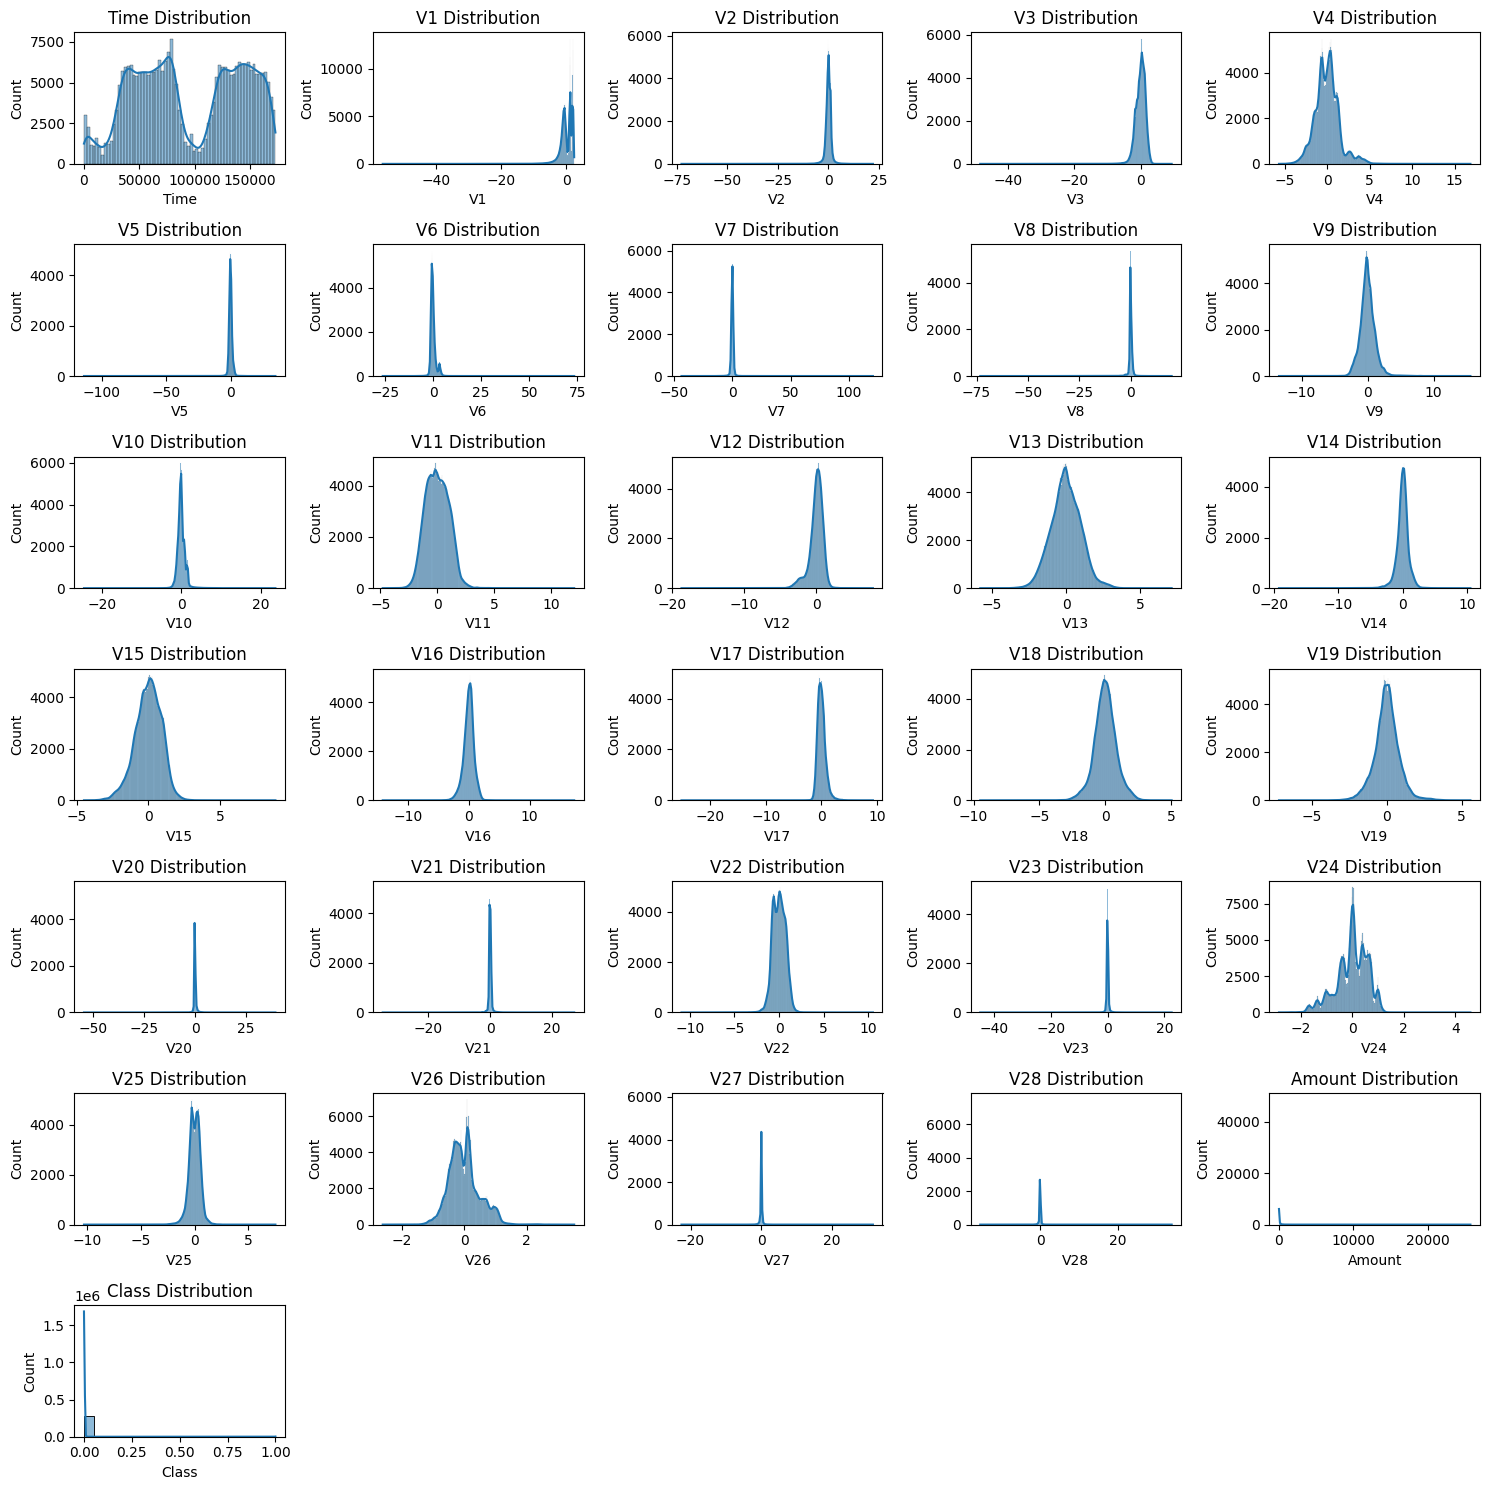

In [6]:
plt.figure(figsize=(15,15))
t = 1
for i in raw_data.columns:
  plt.subplot(7,5,t)
  sns.histplot(raw_data[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

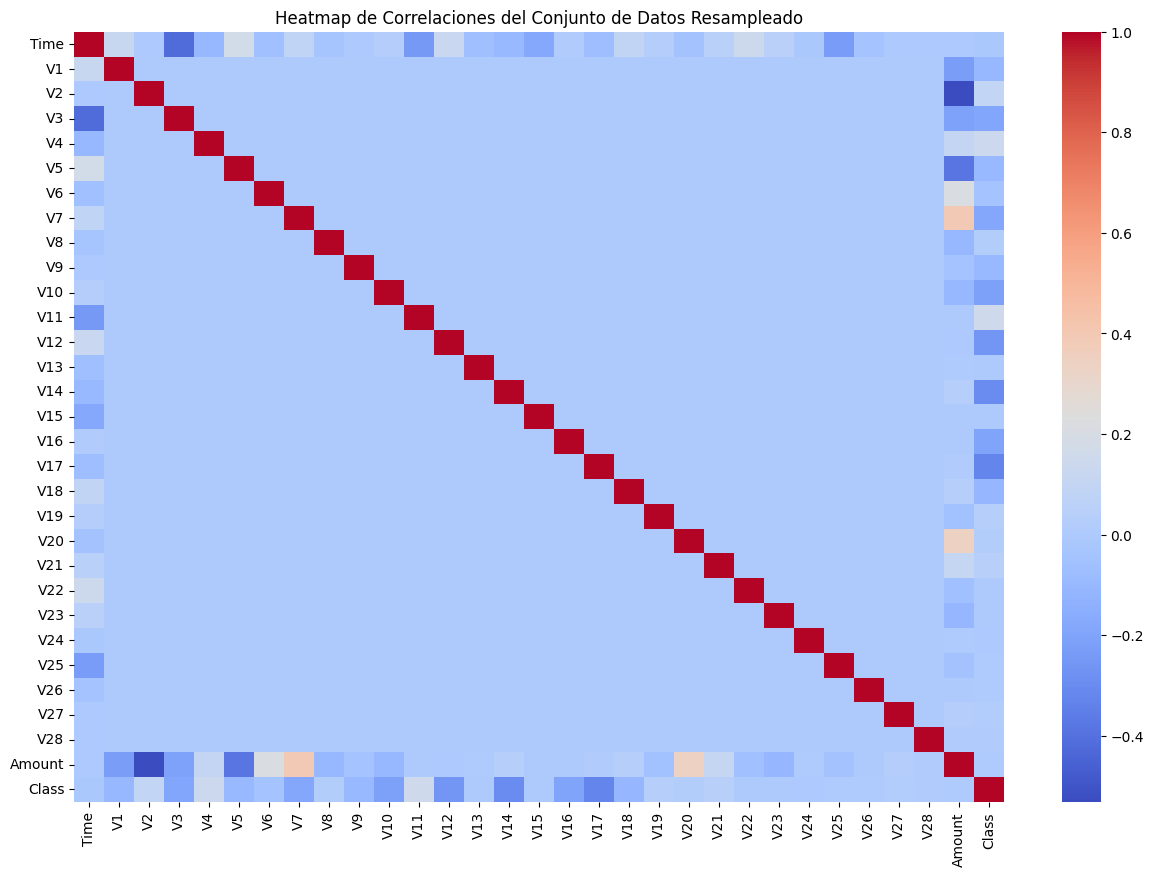

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(raw_data.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlaciones del Conjunto de Datos Resampleado')
plt.show()

## Simple ML Aproximation
Para crear un modelo simple de Machine Learning utilizando un Random Forest con los datos resampleados, seguiremos los siguientes pasos:

1. **Dividir los datos**: Separaremos los datos en conjuntos de entrenamiento y prueba.
2. **Entrenar el modelo**: Utilizaremos el algoritmo de Random Forest para entrenar el modelo con los datos de entrenamiento.
3. **Evaluar el modelo**: Evaluaremos el rendimiento del modelo utilizando el conjunto de prueba.

**Metricas de Evaluación**

En el problema de identificación de 

A continuación, se muestra el código para realizar estos pasos:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

raw_data.dropna(inplace=True)
raw_data.drop_duplicates(inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_TestValidation, y_train, y_TestValidation = train_test_split(raw_data.drop(columns='Class'), raw_data['Class'], test_size=0.4, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_TestValidation, y_TestValidation, test_size=0.5, random_state=65)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=25)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56663     1]
 [   18    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56664
           1       0.98      0.78      0.87        81

    accuracy                           1.00     56745
   macro avg       0.99      0.89      0.93     56745
weighted avg       1.00      1.00      1.00     56745



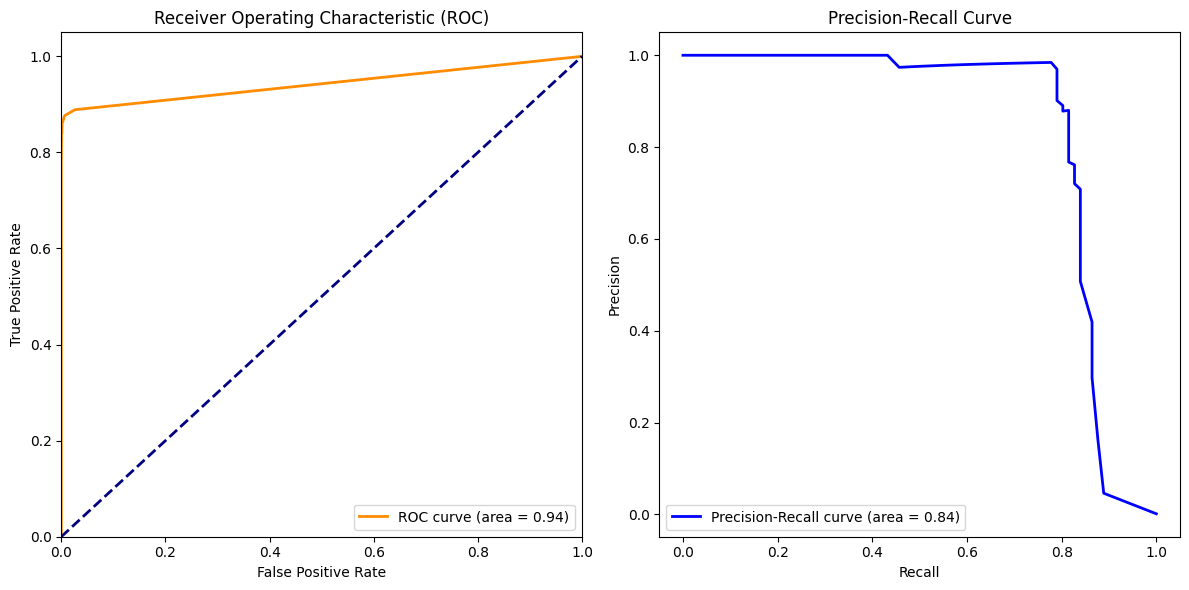

In [9]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calcular las probabilidades de predicción
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

# Graficar la curva ROC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Graficar la curva Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

[[56649     5]
 [   23    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.93      0.75      0.83        92

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



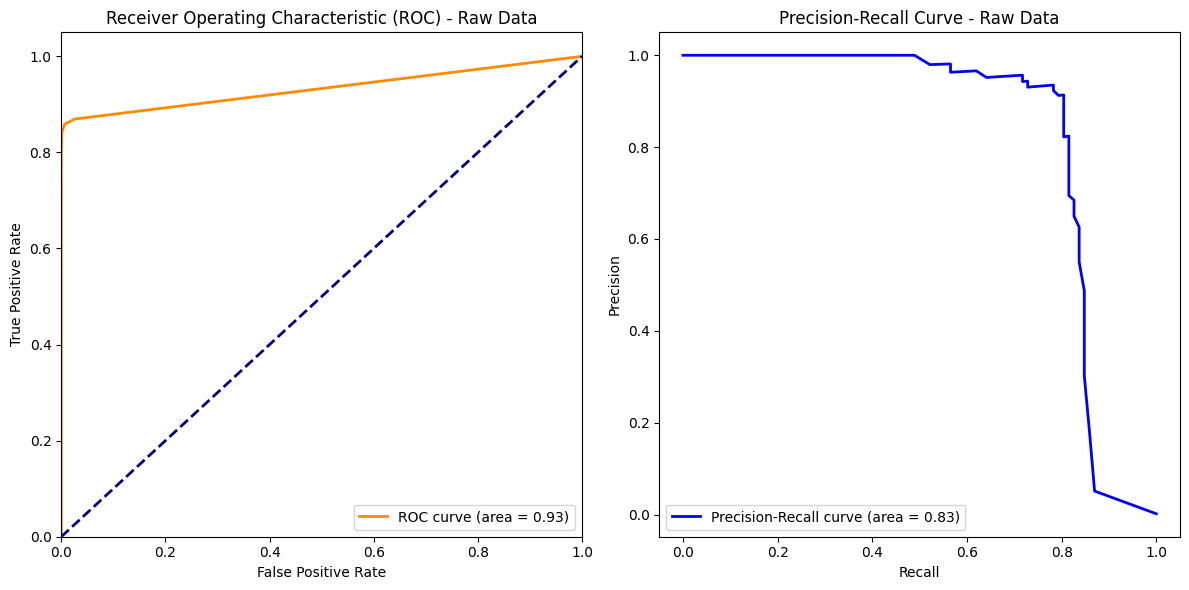

In [10]:
# Realizar predicciones
y_validation_pred = rf_model.predict(X_validation)

# Evaluar el modelo
print(confusion_matrix(y_validation, y_validation_pred))
print(classification_report(y_validation, y_validation_pred))
# Calcular las probabilidades de predicción para todo el conjunto de datos
y_validation_pred_prob = rf_model.predict_proba(X_validation)[:, 1]

# Calcular la curva ROC
fpr_raw, tpr_raw, _ = roc_curve(y_validation, y_validation_pred_prob)
roc_auc_raw = auc(fpr_raw, tpr_raw)

# Calcular la curva Precision-Recall
precision_raw, recall_raw, _ = precision_recall_curve(y_validation, y_validation_pred_prob)
pr_auc_raw = auc(recall_raw, precision_raw)

# Graficar la curva ROC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_raw, tpr_raw, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_raw)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Raw Data')
plt.legend(loc="lower right")

# Graficar la curva Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(recall_raw, precision_raw, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc_raw)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Raw Data')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [11]:
# Save model
import joblib
joblib.dump(rf_model, 'RF_good.pkl')

['RF_good.pkl']